In [57]:
from sklearn.datasets import fetch_openml

# This library contains images of 28x28 pixels.
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [58]:
X, y = mnist['data'], mnist['target']

In [59]:
X.shape

(70000, 784)

In [60]:
y.shape

(70000,)

<function matplotlib.pyplot.show(close=None, block=None)>

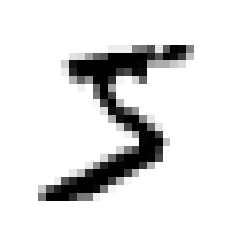

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Getting the first image (5)
# So we must reshape the pixels to fit the image.
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show

In [62]:
# We can see the image was identified as 5, from the target y[0]
y[0]

'5'

In [63]:
import numpy as np
# The label is a string, we cast it to an integer
y = y.astype(np.uint8)

In [64]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

In [65]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [66]:
from sklearn.linear_model import SGDClassifier

# Set the random state to 42, so we can have the same reproducible results.
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [67]:
# Since we know some_digit is 5 from earlier, we trained the model from the value. 
sgd_clf.predict([some_digit])

array([ True])

# Implementing Cross-Validation

In [68]:
# This roughly does the same thing as cross_val_score(). 
# may be needed to implement your own cross-validation.

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))


C:\Users\William\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.95035
0.96035
0.9604


In [69]:
# Using sklearn's cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [70]:
# Creating a "dumb" classifier that predicts if num is not 0.
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [71]:
# Only about 10% of the numbers are 5. so a 90% accuracy from our model above
# Shows accuracy is not the preferred performance measure for for classifiers
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

# Confusion Matrix
A better way to evaluate the performance of a classifier, as a classifier will only have true positive and true negative values
<br>
Below, you will see the visual representation of a Confusion Matrix
<br>
<img src="../img/confusion_matrix.png" alt="Confusion Matrix" style="width: 500px;"/>

In [72]:
# cross_val_predict performs k-fold cross-validation, but instead of returning the evaluation scores (like cross_val_score)
# it returns the prediction made on each test fold.
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [73]:
from sklearn.metrics import confusion_matrix

# Each row represents an actual class
# Each column represents a predicted class
# 1st row (Negative class): [True Negatives: 583892 were correctly classified as non-5s, False Positives: 687 were wrongly classified as 5s]
# 2nd row (Positive class): [False Negatives: 1891 were wrongly classified as non-5s, True Positives: 3530 were correctly classified as 5s]
confusion_matrix(y_train_5, y_train_predict)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

# Precision, Recall, and F score

Precision - Accuracy of the positive predictions. <br>
(TP/(TP + FP))<br><br>
Recall - Ratio of positive instances that are correctly detected by the classifier. <br>
(TP/(TP + FN)) <br><br>

F1 score - precision and recall combined into one metric, known as the harmonic mean. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. <br>
(TP/(TP + ((FN+FP)/2)))  <br>
or <br>
(2/((1/Precision) + (1/recall))) <br>
or <br>
(2 * ((precision*recall)/(precision+recall))) <br><br>

Sometimes you should care more about precision and other times recall. For example, if you trained a classifier to detect videos that are safe for kids, you would prefer a classifier that rejects many good videos (low recall). But keep only safe ones (high precision). Rather than a classifier that has a much higher recall but lets a fewreally bad videos show up in your product.<br><br>

Suppose you train a classifier to detect shoplifters in surveillance images: it is probably fine if your classifier has only 30% precisiom but as long as it has 99% recall(the guards may get a few false alerts, but almost all shoplifters would get caught).

In [74]:
from sklearn.metrics import precision_score, recall_score

# When it claims an image is a 5, it is correct 83% of the time.
precision_score(y_train_5, y_train_predict)

0.8370879772350012

In [75]:
# Only detects 65% of the 5s
recall_score(y_train_5, y_train_predict)

0.6511713705958311

In [76]:
# Combining both precision and recall into 1 variable is known as F1 score
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_predict)

0.7325171197343846

## Decision Threshold
Decision Function  and Decision Threshold - For each instance of a classification decision, it computers a score based on a devision function. If that score is greater than a threshold, it assigns the instance to he positive class; otherwise it assigns it to the negative class
<br>
<br>
Instead of using predict() method, you can use decision_function() method, which returns a score for each isntance, and then use any threshold you want to make predictions based on those scores <br>

In [77]:
# Here we can see the current threshold
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [78]:
# A threshold equal to 0, returns the same result as the predict() method (o.e., True)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [79]:
# Raising the threshold decreases recall. The image itself is a 5, however, a 0-threshold measures it accurately
# While a 8000-threshold causes it to miss
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [80]:
# To measure what threshold to use, use cross_val_predict() function to get the scores of all instances in the training set.
# However, specify you wish to return decision score instead of predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [81]:
# precision_recall_curve() computes precision and recall for all possible thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

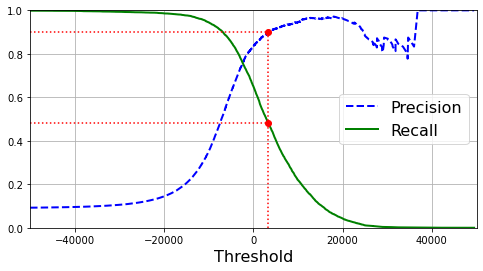

In [82]:
# Using Precision and Recall as functions of the threshold value
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [83]:
# Aiming for a 90% threshold
# From looking at the plot above, you can see we need a threshold of about 8000
# You can search for the lowest threshold that gives you at least 90% precision (np.argmax() will give you the first index
# of the maximum value, which in this case meanse the first True value)
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] #~7816

In [84]:
# Making predictions (instead of calling the classifers predict() method, you can run this code)
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [85]:
# Checking the predictions precision and recall
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [86]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

# The ROC Curve
Receiver Operating Characteristic (ROC) Curve is another common tools used with binary classifier.
<br>
<br>
The ROC Curbe plots the true positive rate (another name for recall) against the false positive rate (FPR). The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to 1 - the true negative rate (TNR), which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence, the ROC curve plots sensitivity(recall) vs 1 - specificity.

In [87]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)